# Sample Data Science Workbook

Template for a typical data science workflow.

Based on the following [guide](https://www.kaggle.com/startupsci/titanic-data-science-solutions).

## Workflow Stages

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Workflow Goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

## 1. Question or Problem Definition

The question we want answered.

> A bit of information provided about the competition

In this example we'll use the Titanic dataset as done in the guide.

## 2. Acquire training and testing data.

In [10]:
# Imports
# Gonna try to keep this to a minimal as could get hectic
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2.1 Data Collection

In [2]:
# Downloading dataset
# Should be the same as used in the guide but unsplit
!wget https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv

--2022-02-04 17:42:57--  https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62002 (61K) [text/plain]
Saving to: ‘titanic_dataset.csv.2’

titanic_dataset.csv 100%[===================>]  60.55K  --.-KB/s    in 0.06s   

2022-02-04 17:42:57 (969 KB/s) - ‘titanic_dataset.csv.2’ saved [62002/62002]



### 2.2 Data Inspection

In [3]:
# Load dataset
df = pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.3 Data Description

What features are available?

In [4]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


What features are categorical/numeric?

What features contain incomplete data? Eg Age/Cabin

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


What features are a mixed type? Eg ticket/cabin

What features may contain errors? Eg Name has a number of different formats

We use describe to get an initial idea of the distribution of the features

In [6]:
df.describe(percentiles=[0.75, 0.8])
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe categorical data

In [7]:
df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 2.4 Assumptions based on data analysis

Refer back to the workflow goals.

Example:

**Correlating:** Seeing how the features correlate to survival.

**Completing:** Age is incomplete.

**Correcting:** Ticket/Cabin could be dropped. Name is non standard.

**Creating:** Extract title as a feature from name. Change age into bands.

**Classifying:** Add to initial assumptions. Eg children and women more likely to survive.


## 3. Wrangle, prepare, cleanse the data.

### 3.1 Correcting by Dropping Features

In [39]:
print(f"Size before: {df.shape}")
df = df.drop(["Ticket", "Cabin", "PassengerId"], axis=1)
print(f"Size after: {df.shape}")

Size before: (891, 12)
Size after: (891, 10)


### 3.2 Creating New Feature

In [49]:
df["Title"] = df.Name.str.extract("([A-Za-z]+)\.")

In [50]:
pd.crosstab(df["Title"], df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


They then replace some of the titles with a rare tag and correct some titles. Eg Ms.

In [55]:
df["Title"] = df["Title"].replace(
    [
        "Lady",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)

df["Title"] = df["Title"].replace("Mlle", "Miss")
df["Title"] = df["Title"].replace("Ms", "Miss")
df["Title"] = df["Title"].replace("Mme", "Mrs")

In [60]:
df.Title.unique()

array([1, 3, 2, 4, 5])

In [58]:
df[["Title", "Survived"]].groupby(["Title"]).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


They then convert this from categorical to ordinal

In [59]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df["Title"] = df["Title"].map(title_mapping)

In [61]:
df.Title.unique()

array([1, 3, 2, 4, 5])

We can now drop the name column

In [63]:
df = df.drop("Name", axis=1)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


### 3.2 Converting Categorical Features

In [65]:
df["Sex"] = df["Sex"].map({"female": 1, "male": 0}).astype(int)

### 3.3 Completing Numerical Features

They use a fancy correlation by guessing the age based on the other features.
Not too interested in showing all that here.

## 4. Analysing Data

### 4.1 Analysing by Pivoting Data

Used to help us confirm our assumptions.

In [8]:
df[["Pclass", "Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
df[["Sex", "Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


### 4.2 Analyse by Visualising

#### 4.2.1 Correlating Numerical Features

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

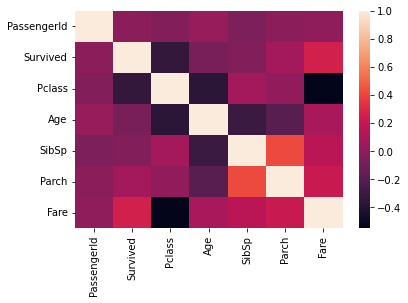

In [12]:
sns.heatmap(df.corr())

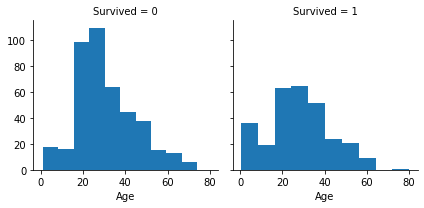

In [15]:
# Creates the right number of plots
g = sns.FacetGrid(df, col="Survived")
# Applies the function to each plot
g.map(plt.hist, "Age")

#### 4.2.2 Correlating Numerical and Ordinal Features

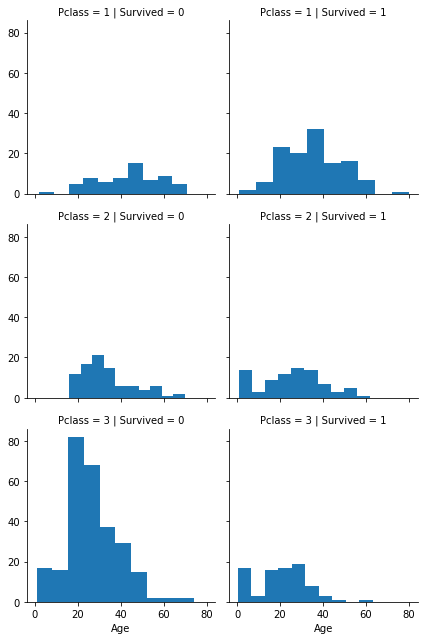

In [24]:
grid = sns.FacetGrid(df, col="Survived", row="Pclass")
grid.map(plt.hist, "Age")

#### 4.2.3 Correlating Categorical Features

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


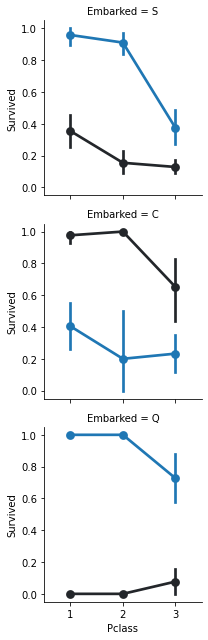

In [29]:
# Not really sure what's going on here
grid = sns.FacetGrid(df, row="Embarked")
grid.map(sns.pointplot, "Pclass", "Survived", "Sex")

#### 4.2.4 Correlating Categorical & Numerical Features

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


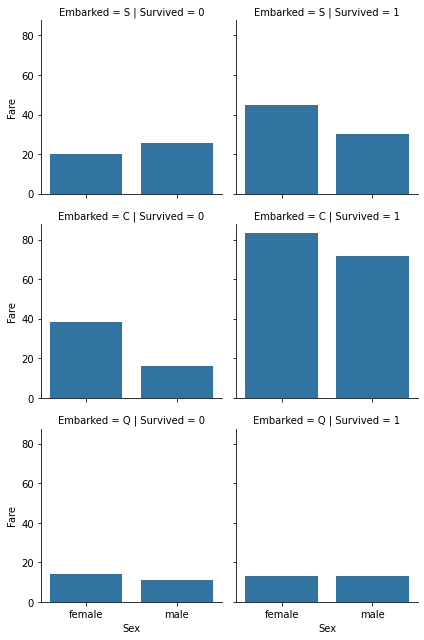

In [35]:
grid = sns.FacetGrid(df, row="Embarked", col="Survived")
grid.map(sns.barplot, "Sex", "Fare", ci=None)